# Random Forest Classifier

## 1. Import Packages and Libraries-Kitaplıkları İçe Aktarma


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

warnings.filterwarnings("ignore")



## 2. Importing Dataset- Veri Kümesini İçe Aktarma


In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

#https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

## 3. Preparing Data For Training- Verileri Eğitim İçin Hazırlama


In [3]:
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# split data into input and target variable-Verileri "bagımsız" ve "bağımlı" değişken olarak bölüyoruz
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

## 4. Feature Scaling- Özellik Ölçeklendirme


In [6]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.20, random_state=42)

## 5. Create the Classifier- Algoritmanın Eğitimi


In [8]:
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# predictin on the test set
y_pred = classifier.predict(X_test)

## 6. Calculate Model Accuracy- Algoritmanın Değerlendirilmesi


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [11]:
print(confusion_matrix(y_test,y_pred))


[[38  3]
 [ 9 10]]


In [12]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.77      0.53      0.62        19

    accuracy                           0.80        60
   macro avg       0.79      0.73      0.74        60
weighted avg       0.80      0.80      0.79        60



In [13]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)


In [14]:
#display
feature_importances_df

,feature,importance
11,time,0.356913
7,serum_creatinine,0.143760
4,ejection_fraction,0.142222
6,platelets,0.080900
2,creatinine_phosphokinase,0.079373
0,age,0.076502
8,serum_sodium,0.057892
1,anaemia,0.013981
3,diabetes,0.013044
10,smoking,0.012642


## 7-Visualize İmportant Features- Görselleştirme


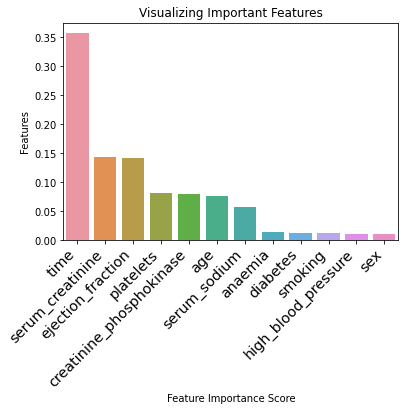

In [15]:
# visualize important features

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()